<a href="https://colab.research.google.com/github/pranavi-rohit/antibiotic-resistance-in-wastewater-systems/blob/main/antibiotic_variation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization
This block of code installs the Mesa library.

<font color = "green">*This code is acquired.*

In [ ]:
!pip install mesa

Other calls initialize essential functions within Mesa that are neccessary for the program to run.

<font color = "green">*This code is acquired.*

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.modules import CanvasGrid
from mesa.batchrunner import BatchRunner

In [ ]:
from google.colab import drive
drive.mount("drive")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Libraries such as matplotlib, seaborn, random, and numpy are added.

<font color = "green">*This code is acquired.*

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import random
import numpy as np

# Data Collection
The majority of this section consists of functions expressing raw model values as different measures of interest.

In [ ]:
def hgt_c(model):
  agent_hgt_c = [agent.hgt_c for agent in model.schedule.agents]
  return np.sum(agent_hgt_c)

## Bacterial Death
These functions calculate bacterial death in various contexts using model data.

The `bact_kll_gen_all` function calculates the rates of bacteria killed, out of all the bacteria present at any point throughout the wastewater system.



In [ ]:
def bact_kll_gen_all(model):
  percent_bkg_a = (model.dead_bact / model.max_agent_id) * 100
  # print(percent_bkg_a)
  return percent_bkg_a
  # decimal_bkg_a = model.dead_bact / model.max_agent_id
  # percent_bkg_a = decimal_bkg_a * 100

The `bact_kll_gen_last_pop` function calculates the rates of bacteria killed, out of the total bacterial population in the wastewater system (at the end of the last hour).

In [ ]:
def bact_kll_gen_last_pop(model):
  decimal_bkg_lp = model.dead_bact / model.population_total
  percent_bkg_lp = decimal_bkg_lp * 100

### Antibiotic Residue
The `bact_kll_abr_dead` function calculates what percent of deaths (assuming the value for all bacterial deaths is 100%) are caused by both antibiotics.

In [ ]:
def bact_kll_abr_dead(model):
  bact_death_abr = model.death_abr1 + model.death_abr2
  percent_bka_d = (bact_death_abr / model.dead_bact) * 100
  return percent_bka_d

#### All
The `bact_kll_abr_all` function calculates what percent of deaths out of the entire model population are caused by both antibiotics.

In [ ]:
def bact_kll_abr_all(model):
  bact_death_abr = model.death_abr1 + model.death_abr2
  percent_bka_a = (bact_death_abr / model.population_total) * 100
  return percent_bka_a

The `bact_kll_abr_all` function calculates what percent of agents dead from either antibiotic 1 were susceptible, resistant to one antibiotic, or resistant to both.

In [ ]:
# Out of agents killed by antibiotics, what percent were susceptible, resistant to one antibiotic, or resistant to both.

#### Antibiotic 1
The `bact_kll_abr1_all` function calculates what percent of deaths out of the entire model population are caused by antibiotic 1.

In [ ]:
def bact_kll_abr1_all(model):
  percent_bka1_a = (model.death_abr1 / model.population_total) * 100
  return percent_bka1_a

The `bact_kll_abr_all` function calculates what percent of agents dead from antibiotic 1 were susceptible, resistant to one antibiotic, or resistant to both.

In [ ]:
# Out of agents killed by antibiotic 1, what percent were susceptible, resistant to one antibiotic, or resistant to both.

#### Antibiotic 2
The `bact_kll_abr2_all` function calculates what percent of deaths out of the entire model population are caused by antibiotic 2.

In [ ]:
def bact_kll_abr1_all(model):
  percent_bka2_a = (model.death_abr2 / model.population_total) * 100
  return percent_bka2_a

The `bact_kll_abr_all` function calculates what percent of agents dead from antibiotic 2 were susceptible, resistant to one antibiotic, or resistant to both.

In [ ]:
# Out of agents killed by antibiotic 2, what percent were susceptible, resistant to one antibiotic, or resistant to both.

### Natural Processes

In [ ]:
def bact_kll_ntrl_all(model):
  percent_bkn_a = (model.death_ntrl / model.max_agent_id) * 100
  return percent_bkn_a

## Resistant Bacterial Growth

In [ ]:
def abr_bact_last_pop(model):
  abr_pop = 0
  for agent in model.schedule.agents:
    if agent.abr1 == 1 or agent.abr2 == 1:
      abr_pop += 1
  percent_ab_lp = (abr_pop / model.population_total) * 100
  return percent_ab_lp

## Population Comparisons

### Initial Proportions

In [ ]:
def susc_bact_last_pop(model):
  susc_pop = 0
  for agent in model.schedule.agents:
    if agent.abr1 == 0 and agent.abr2 == 0:
      susc_pop += 1

  percent_sb_lp = (susc_pop / model.population_total) * 100
  return percent_sb_lp

In [ ]:
def abr1_o_bact_last_pop(model):
  abr1_o_pop = 0
  for agent in model.schedule.agents:
    if agent.abr1 == 1 and agent.abr2 == 0:
      abr1_o_pop += 1

  percent_a1b_lp = (abr1_o_pop / model.population_total) * 100
  return percent_a1b_lp

In [ ]:
def abr2_o_bact_last_pop(model):
  abr2_o_pop = 0
  for agent in model.schedule.agents:
    if agent.abr1 == 0 and agent.abr2 == 1:
      abr2_o_pop += 1

  percent_a2b_lp = (abr2_o_pop / model.population_total) * 100
  return percent_a2b_lp

In [ ]:
def abr1_abr2_bact_last_pop(model):
  abr1_abr2_pop = 0
  for agent in model.schedule.agents:
    if agent.abr1 == 1 and agent.abr2 == 1:
      abr1_abr2_pop += 1

  percent_a1a2b_lp = (abr1_abr2_pop / model.population_total) * 100
  return percent_a1a2b_lp

### Final Proportions (Graph 4)

In [ ]:
def change_in_resistance_hgt(model):
  hgt_resistance_counter = 0
  for agent in model.schedule.agents:
    if agent.hgt_c == 1:
      hgt_resistance_counter += 1
    elif agent.hgt_c == 2:
      hgt_resistance_counter += 2

  hgt_prop = (hgt_resistance_counter / (model.max_agent_id * 2)) * 100
  return hgt_prop

In [ ]:
def change_in_resistance_chrm(model):
  chrm_resistance_counter = 0
  for agent in model.schedule.agents:
    if agent.ch_mutate == 1:
      chrm_resistance_counter += 1
    elif agent.ch_mutate == 2:
      chrm_resistance_counter += 2

  chrm_prop = (chrm_resistance_counter / (model.max_agent_id * 2)) * 100
  return chrm_prop

### Graph 2

In [ ]:
def death_susc_pop(model):
  if model.dead_bact > 0:
    percent_dsb_a = (model.susc_pop_death / model.dead_bact) * 100
    return percent_dsb_a
  else:
    return 0

In [ ]:
def death_abr1_o_pop(model):
  if model.dead_bact > 0:
    percent_dba1_a = (model.abr1_o_pop_death / model.dead_bact) * 100
    return percent_dba1_a
  else:
    return 0

In [ ]:
def death_abr2_o_pop(model):
  if model.dead_bact > 0:
    percent_dba2_a = (model.abr2_o_pop_death / model.dead_bact) * 100
    return percent_dba2_a
  else:
    return 0

In [ ]:
def death_abr1_abr2_pop(model):
  if model.dead_bact > 0:
    percent_dba1a2_a = (model.abr1_abr2_pop_death / model.dead_bact) * 100
    return percent_dba1a2_a
  else:
    return 0

# Classes
This section initializes both the agents and the world associated with the model. The world represents a wastewater system (at a much smaller, but still complete scale).

## Agents

### Properties
The class defines an agent with various properties.
*   `self.abr1` signfies the agent's resistance to Antibiotic 1, and `self.abr2` signfies the agent's resistance to Antibiotic 2.
*   A value of 0 for `self.abr1` or `self.abr2` means the bacteria is susceptible to that antibiotic, while a value of 1 indicates resistance to it.
*   Bacteria can be susceptible to both antibiotics, only one and not the other, or both.





*   List item
*   List item



### Bacteria
This is the first and primary agent class within the wastewater system, and he class defines agents with various properties.
#### Properties
*   `self.abr1` signfies the agent's resistance to Antibiotic 1, and `self.abr2` signfies the agent's resistance to Antibiotic 2.
*   A value of 0 for `self.abr1` or `self.abr2` means the bacteria is susceptible to that antibiotic, while a value of 1 indicates resistance to it.
*   Bacteria can be susceptible to both antibiotics, only one and not the other, or both.
*   An if loop (as seen below) dictates the chances a bacteria will become resistant to an antibiotic when agents are intialized.
```
abr1_d = random.randint(1, 101) # Assigns a random number from 1-100.
    if abr1_d < 10: # Essentially 10% of the population can be resistant to antibiotic 1.
      self.abr1 = 1
    else:
      self.abr1 = 0
```

#### Counters
*   `self.hgt_tf`, `self.hgt_c`, and `self.hgt_td` count how many times a bacteria has recieved horizontal gene transfer through transformation, conjugation, and transduction respectively.
*   `self.ch_mutate` tracks every time a bacteria becomes resistant to an antibiotic through mutations.
*   `self.hours_alive` collects data on the number of hours the bacteria has lived (based on the number of model steps, as one step equals an hour).

#### Functions
*   `new_agents` is called in `reproduce` and creates new agents (bacteria) with unique IDs that mirror the properties of their parent.

**Please review the rest of code to note the other functions employed.**

In [ ]:
class Bacteria(Agent):
  # This is an agent with no fixed properties.
  def __init__(self, unique_id, model):
    super().__init__(unique_id, model)

    abr1_d = random.randint(1, 101)
    if abr1_d < 5:
      self.abr1 = 1
    else:
      self.abr1 = 0

    abr2_d = random.randint(1, 101)
    if abr2_d < 5:
      self.abr2 = 1
    else:
      self.abr2 = 0
    # 0 represents no resistance to the antibiotic.
    # 1 represents resistance to the antibiotic.

    # Each of these variables serves as a counter for a bacterial condition.
    self.hgt_tf = 0
    self.hgt_c = 0
    self.hgt_td = 0
    self.ch_mutate = 0
    self.death_cause = None
    # self.hours_alive = 0

    self.agent_pop = model.population_total

  def move(self):
    possible_steps = self.model.grid.get_neighborhood(
        self.pos,
        moore = True, # Includes all 8 surrounding squares.
        include_center = True # Center cell (the agent) is considered a neighbor, which means there's a chance the agent won't move.
    )
    new_position = self.random.choice(possible_steps)
    self.model.grid.move_agent(self, new_position)

  def hgt_conjugation(self):
    cellmates = self.model.grid.get_cell_list_contents([self.pos])
    if len(cellmates) > 1: # Specifies that horizontal gene transfer can only happen to another bacteria (and therefore, doesn't mess up counts).
      other = self.random.choice(cellmates)

      while other.unique_id == self.unique_id:
        other = self.random.choice(cellmates)
    # Create an if-else loop here to incorporate the chance of another bacteria gaining antibiotic resistance.

      hgt_c_rate = random.uniform(0.01, 0.000000001)
      if self.abr1 == 1 and other.abr1 == 0: # The second parameter is only reqiured if horizontal gene transfer cannot be acquired multiple times.
        hgt_c_chance = random.random()
        if hgt_c_chance < hgt_c_rate:
          other.hgt_c += 1
          other.abr1 = 1

      if self.abr2 == 1 and other.abr2 == 0:
        hgt_c_chance = random.randint(1, 101)
        if hgt_c_chance < hgt_c_rate:
          other.hgt_c += 1
          other.abr2 = 1

  def mutate(self):
    chr_m_rate_abr1 = 0.00000235
    chr_m_rate_abr2 = 0.0000000235

    if self.abr1 == 0:
      chr_m_chance = random.random()
      if chr_m_chance < chr_m_rate_abr1:
        self.abr1 = 1
        self.ch_mutate += 1

    if self.abr2 == 0:
      chr_m_chance = random.random()
      if chr_m_chance < chr_m_rate_abr2:
        self.abr2 = 1
        self.ch_mutate += 1

  def new_agents(self, num_new_agents):
      for ii in range(num_new_agents):
        unique_id_check = self.model.max_agent_id # Generates a unique, random ID for the agent, checking that no other agents have the same ID.
        new_bact = Bacteria(unique_id_check, self.model) # This intializes a new agent.
        self.model.max_agent_id += 1

        # This sets agent properties equal to the parent bacteria.
        new_bact.abr1 = self.abr1
        new_bact.abr2 = self.abr2

        self.model.grid.place_agent(new_bact, self.pos) # This initializes the new agent.
        self.model.schedule.add(new_bact) # This adds the new agent to the scheduler.
        model.population_total += 1 # Population of bacteria in the model now reflect a new agent being added.

  def reproduce(self):
    if model.population_total < 625000:
      if self.abr1 == 0 and self.abr2 == 0:
        num_new_agents = random.randint(2, 4) # Creates anywhere from 10-15 new bacteria.
        self.new_agents(num_new_agents)

      if self.abr1 == 1 and self.abr2 == 0:
        num_new_agents = random.randint(1, 3) # Creates anywhere from 1-2 new bacteria.
        self.new_agents(num_new_agents)

      elif self.abr1 == 0 and self.abr2 == 1:
        num_new_agents = random.randint(1, 3) # Creates anywhere from 1-2 new bacteria.
        self.new_agents(num_new_agents)

      elif self.abr1 == 1 and self.abr2 == 1:
        num_new_agents = random.randint(1, 3) # Creates anywhere from 1-2 new bacteria.
        self.new_agents(num_new_agents)
  '''
  Alternate (10)
  '''

  def bact_population(self):
    if self.abr1 == 0 and self.abr2 == 0:
      model.susc_pop_death += 1

    if self.abr1 == 1 and self.abr2 == 0:
      model.abr1_o_pop_death += 1

    if self.abr1 == 0 and self.abr2 == 1:
      model.abr2_o_pop_death += 1

    if self.abr1 == 1 and self.abr2 == 1:
      model.abr1_abr2_pop_death += 1

  def death(self):
    if self.abr1 == 1:
      abr1_hf_kl = 1000 # ug/ml

    elif self.abr1 == 0:
      abr1_hf_kl = 49.1 # ug/ml

    if self.abr2 == 1:
      abr2_hf_kl = 1000 # ug/ml

    elif self.abr2 == 0:
      abr2_hf_kl = 49.1 # ug/ml

  # Calculates the probability of bacterial death.
    abr1_dc = (model.abr1_con) / (model.abr1_con + (abr1_hf_kl))
    abr2_dc = (model.abr2_con) / (model.abr2_con + (abr2_hf_kl))

    self.death_cause = None
    abr_chance = random.randint(1, 3)

    if abr_chance == 1:
      abr1_kl = random.random()
      if abr1_kl < abr1_dc:
        self.model.grid._remove_agent(self.pos, self)
        self.model.schedule.remove(self)

        self.death_cause = "Antibiotic 1"
        self.bact_population()

        model.dead_bact += 1
        model.death_abr1 += 1
        model.population_total -= 1

        if self.death_cause == None:
          abr2_kl = random.random()
          if abr2_kl < abr2_dc:
            self.model.grid._remove_agent(self.pos, self)
            self.model.schedule.remove(self)

            self.death_cause = "Antibiotic 2"
            self.bact_population()

            model.dead_bact += 1
            model.death_abr2 += 1
            model.population_total -= 1

    elif abr_chance == 2:
      abr2_kl = random.random()
      if abr2_kl < abr2_dc:
        self.model.grid._remove_agent(self.pos, self)
        self.model.schedule.remove(self)

        self.death_cause = "Antibiotic 2"
        self.bact_population()

        model.dead_bact += 1
        model.death_abr2 += 1
        model.population_total -= 1

        if self.death_cause == None:
          abr1_kl = random.random()
          if abr1_kl < abr1_dc:
            self.model.grid._remove_agent(self.pos, self)
            self.model.schedule.remove(self)

            self.death_cause = "Antibiotic 1"
            self.bact_population()

            model.dead_bact += 1
            model.death_abr1 += 1
            model.population_total -= 1

    if self.death_cause == None:
      ntrl_d = random.random()
      if ntrl_d < 0.004:
        self.model.grid._remove_agent(self.pos, self)
        self.model.schedule.remove(self)

        self.death_cause = "Natural"
        self.bact_population()

        model.dead_bact += 1
        model.death_ntrl += 1
        model.population_total -= 1


    '''
    Alternate (4) https://colab.research.google.com/drive/1YVyG77l5fKT4HnPmSVsUd4d4Nr5Tz9At#scrollTo=W0VcTnZhGCA3&line=1&uniqifier=1
    '''

    # Agent "dies", disappears from world.
    # Track how death occured.
    # Have a counter (based on the number of model steps performed) that keeps track of how many hours a bacteria has been alive.
  '''
  Alternate (5)
  Alternate (6)
  '''
  def step(self):
    self.move()
    if self.abr1 == 1 or self.abr2 == 1:
      self.hgt_conjugation()

    self.mutate()
    self.reproduce()
    self.death()

    # self.outputs()
    # self.hours_alive += 1

    # # print("{} = {} + {} + {} + {} pop,     {} = {} + {} + {} death cause     {}step  {}, {} con 1, 2".format(model.population_total,
    #                                                                                                     model.susc_pop, model.abr1_o_pop, model.abr2_o_pop, model.abr1_abr2_pop,
    #                                                                                                     model.dead_bact, model.death_abr1, model.death_abr2, model.death_ntrl,
    #                                                                                                     model.step_cntr,
    #                                                                                                     model.abr1_con, model.abr2_con))


    # print("Population: {},      Death (t, a1, ar, n): {} = {} + {} + {}       Model Step: {}        ABR: {}, {}         ".format(model.population_total, model.dead_bact, model.death_abr1, model.death_abr2, model.death_ntrl, model.step_cntr, model.abr1_con, model.abr2_con))


## World
This begins the "world" class, named `Wastewater` in relation the project. It also accounts for advancing the model step by step.

### Properties
*   All global properties are congregated within this class, which apply equally to all agents within the model.
*   `self.dead_bact`, `self.death_abr1`, `self.death_abr2`, and `self.death_ntrl` are global properties.

## Grid
A `MultiGrid` creates the spatial component of the model, allowing multiple agents to be in the same cell.



In [ ]:
class Wastewater(Model):
  # This creates a model with N number of agents.
  def __init__(self, N, width, height, abr1_con_m, abr2_con_m):
    self.num_agents = N
    self.grid = MultiGrid(width, height, True)
    self.schedule = RandomActivation(self)
    self.running = True

    self.abr1_con = abr1_con_m
    self.abr2_con = abr2_con_m
    self.step_cntr = 1

    self.max_agent_id = 1
    self.population_total = 0
    '''
    # A population counter for different antibiotic susceptibilities.
    self.susc_pop = 0
    self.abr1_o_pop = 0
    self.abr2_o_pop = 0
    self.abr1_abr2_pop = 0

    '''
    # Categorizes the deaths of agents by their antibiotic susceptibilities.
    self.susc_pop_death = 0
    self.abr1_o_pop_death = 0
    self.abr2_o_pop_death = 0
    self.abr1_abr2_pop_death = 0

    # Refers to the cause of death for each agent.
    self.dead_bact = 0
    self.death_abr1 = 0
    self.death_abr2 = 0
    self.death_ntrl = 0
    # Define the global properties here.
    '''
    Alternate (9)
    '''
    # Add inflow and outflow rates if you're not assuming they are 0.
    for i in range(self.num_agents):
      agent = Bacteria(self.max_agent_id, self)
      self.schedule.add(agent)
      self.max_agent_id += 1
      self.population_total += 1

      x = self.random.randrange(self.grid.width)
      y = self.random.randrange(self.grid.height)

      self.grid.place_agent(agent, (x, y))
    '''
    self.graph1 = DataCollector(
      model_reporters = {"% of Resistant Bacteria": abr_bact_last_pop}, # Defines functions that computes the data you're interested in collecting.
      agent_reporters = {"AB1 Resistance": "abr1", "AB2 Resistance": "abr2" })

    self.graph2 = DataCollector(
      model_reporters = {"% of Susceptible Bacteria": susc_bact_last_pop},
      agent_reporters = {"AB1 Resistance": "abr1", "AB2 Resistance": "abr2" })
    '''

    self.graph1 = DataCollector(
      model_reporters = {"Total": abr_bact_last_pop, "Antibiotic 1 Only": abr1_o_bact_last_pop, "Antibiotic 2 Only": abr2_o_bact_last_pop, "Antibiotic 1 & 2": abr1_abr2_bact_last_pop}, # Defines functions that computes the data you're interested in collecting.
      agent_reporters = {"AB1 Resistance": "abr1", "AB2 Resistance": "abr2" })

    self.graph2 = DataCollector(
      model_reporters = {"Susceptible": death_susc_pop, "Antibiotic 1 Only": death_abr1_o_pop, "Antibiotic 2 Only": death_abr2_o_pop, "Antibiotic 1 & 2": death_abr1_abr2_pop}, # Defines functions that computes the data you're interested in collecting.
      agent_reporters = {"AB1 Resistance": "abr1", "AB2 Resistance": "abr2" })

    self.graph3 = DataCollector(
      model_reporters = {"Susceptible": susc_bact_last_pop, "Antibiotic 1 Only": abr1_o_bact_last_pop, "Antibiotic 2 Only": abr2_o_bact_last_pop, "Antibiotic 1 & 2": abr1_abr2_bact_last_pop}, # Defines functions that computes the data you're interested in collecting.
      agent_reporters = {"AB1 Resistance": "abr1", "AB2 Resistance": "abr2" })

    self.graph4 = DataCollector(
      model_reporters = {"% through Horizontal Gene Transfer": change_in_resistance_hgt, "% through Chromosomal Mutations": change_in_resistance_chrm},
      agent_reporters = {"Model Population": "agent_pop"})




  def step(self): # Advances the model by one step.
    self.graph1.collect(self)
    self.graph2.collect(self)
    self.graph3.collect(self)
    self.graph4.collect(self)

    self.schedule.step()
    self.step_cntr += 1 # Counts the number of model steps that have been iterated through.
    self.abr1_con += inc_abr1_con
    self.abr2_con += inc_abr2_con
    print("Population: {},      Death (t, a1, ar, n): {} = {} + {} + {}       Model Step: {}        ABR: {}, {}         ".format(self.population_total, self.dead_bact, self.death_abr1, self.death_abr2, self.death_ntrl, self.step_cntr, self.abr1_con, self.abr2_con))

# Calls
This section encompasses the different calls and parameters defined for the model.

## Test (1)
Randomly prints 10 agents and their qualities.

<font color = "green">*This code is acquired.*

```
empty_model = Wastewater(10)
empty_model.step()
```



In [ ]:
# Not in use right now.

## Test (2)
Prints the initial conditions of the model (no agent interactions, movement, reproduction, or death is recorded).

<font color = "green">*This code is acquired.*


```
model = Wastewater(10000, 100, 100)
for i in range(0):
  model.step()
```



In [ ]:
# Not in use right now.

## Test (3)
Primary call block, running this block initiates the simulation with the given parameters.

<font color = "green">*The first and latter half of the second block of code (lines 8-10) are acquired.*



In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


Defines antibiotic concentration, initial bacteria population, and world size for the simulation.

*   This is an additional code block, optimized to run a "varied antibiotic concentration" as the antibiotic concentration is not fixed, rather increasing steadily every hour.
* Running a simulation with a fixed (stable) antibiotic concentration does not require this block, simply the rest of the program to stay intact.

In [ ]:
final_abr1_con = 25
final_abr2_con = 25
time_step = 25

inc_abr1_con = final_abr1_con / time_step
inc_abr2_con = final_abr2_con / time_step

model = Wastewater(6250, 25, 25, inc_abr1_con, inc_abr2_con) # Add antibiotic concentration parameters.
for i in range(time_step):
  model.step()

Population: 24494,      Death (t, a1, ar, n): 91 = 36 + 37 + 18       Model Step: 2        ABR: 2.0, 2.0         
Population: 95866,      Death (t, a1, ar, n): 800 = 333 + 346 + 121       Model Step: 3        ABR: 3.0, 3.0         
Population: 375125,      Death (t, a1, ar, n): 4641 = 2041 + 2117 + 483       Model Step: 4        ABR: 4.0, 4.0         
Population: 624999,      Death (t, a1, ar, n): 24582 = 11355 + 11287 + 1940       Model Step: 5        ABR: 5.0, 5.0         
Population: 624999,      Death (t, a1, ar, n): 64888 = 30409 + 30149 + 4330       Model Step: 6        ABR: 6.0, 6.0         
Population: 625001,      Death (t, a1, ar, n): 112176 = 52916 + 52623 + 6637       Model Step: 7        ABR: 7.0, 7.0         
Population: 625000,      Death (t, a1, ar, n): 165746 = 78612 + 78240 + 8894       Model Step: 8        ABR: 8.0, 8.0         
Population: 625002,      Death (t, a1, ar, n): 225435 = 107032 + 107153 + 11250       Model Step: 9        ABR: 9.0, 9.0         
Population

# Batches
Automates the process to run the same simulation (same parameters, variables, etc.) multiple times.

<font color = "green">*The structure of this code was acquired, but variable names are unique.*

In [ ]:
'''
fixed_params = {"width": 100,
               "height": 100}
variable_params = {"N": range(10, 100, 100)}

batch_run = BatchRunner(Wastewater,
                        variable_params,
                        fixed_params,
                        iterations = 2,
                        max_steps = 3,
                        model_reporters = {"All_Bacteria_Killed": bact_kll_gen_all})
batch_run.run_all()
'''

'\nfixed_params = {"width": 100,\n               "height": 100}\nvariable_params = {"N": range(10, 100, 100)}\n\nbatch_run = BatchRunner(Wastewater,\n                        variable_params,\n                        fixed_params,\n                        iterations = 2,\n                        max_steps = 3,\n                        model_reporters = {"All_Bacteria_Killed": bact_kll_gen_all})\nbatch_run.run_all()\n'

In [ ]:
'''
run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.N, run_data.All_Bacteria_Killed)
'''

'\nrun_data = batch_run.get_model_vars_dataframe()\nrun_data.head()\nplt.scatter(run_data.N, run_data.All_Bacteria_Killed)\n'

# Outputs

## Visualizations
Consists of some functions to organize and visualize the data from each simulation.

In [ ]:
color_palette = ["#FDAE33", "#EECC16", "#A4C61A", "#62BB35", "#37A862"]

### Population
This creates a grid establishing the agent distribution in the wastewater system--a snapshot of where agents are located after the simulation is complete.

<font color = "green">*This code is acquired, apart from the values entered which are adjusted to best accomodate and format the graph.*

In [ ]:
import numpy as np

In [ ]:
agent_counts = np.zeros((model.grid.width, model.grid.height)) # Creates an array with dimensions specified before.

In [ ]:
for patch in model.grid.coord_iter(): # Iterates over every patch in the model (as of now, 10,000 patches).
    patch_content, x, y = patch
    # patch_content is probably a list of everything contained in the patch, such as the bacterial agents.
    # x, y likely refers to the patch's coordinates.

    agent_count = len(patch_content) # Specifies how many agents are in patch (as it's taking the len of the list).
    agent_counts[x][y] = agent_count # The number of agents (calculated in the line before) is specified in the numpy array.

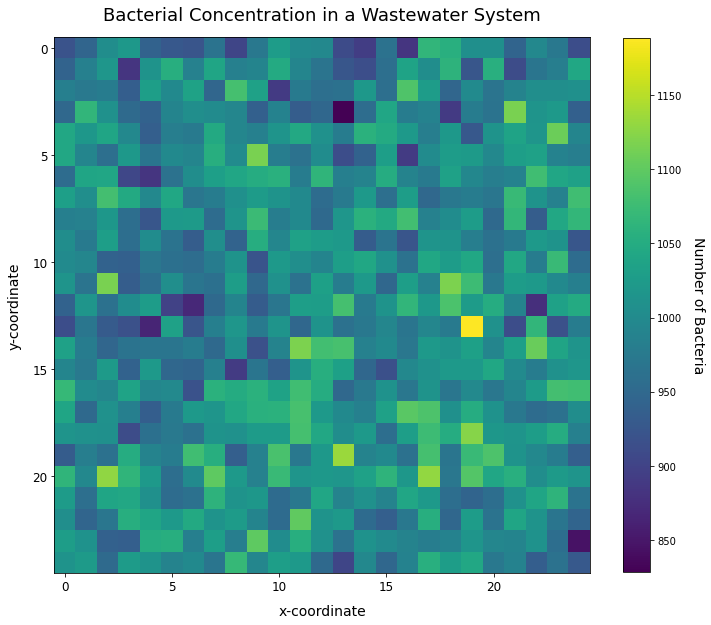

In [ ]:
plt.figure(figsize = (12,12))

plt.title("Bacterial Concentration in a Wastewater System", fontsize = 18, y = 1.02)

plt.xlabel("x-coordinate", fontsize = 14, labelpad = 11)
plt.ylabel("y-coordinate", fontsize = 14, labelpad = 11)

plt.tick_params(labelsize = 12);

image = plt.imshow(agent_counts, interpolation='nearest')
c_bar = plt.colorbar(image, shrink = 0.82)

c_bar.ax.get_yaxis().labelpad = 22
c_bar.ax.set_ylabel("Number of Bacteria", rotation = 270, fontsize = 14)

plt.show()

### Time-Oriented
<font color = "green">*The structure of this code was acquired, but variable names and file pathways are unique.*

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
graph1.head()

,Total,Antibiotic 1 Only,Antibiotic 2 Only,Antibiotic 1 & 2
0,7.904000,3.936000,3.808000,0.160000
1,5.960643,2.972156,2.845595,0.142892
2,4.551144,2.267749,2.173868,0.109528
3,3.459913,1.724758,1.653049,0.082106
4,3.038725,1.506722,1.465282,0.066720


In [ ]:
graph2 = model.graph2.get_model_vars_dataframe()
graph2.head()

# graph2.to_csv("graph2_vary_ab_low_abr.csv")
# !cp graph2_vary_ab_low_abr.csv "drive/My Drive/"

In [ ]:
graph3 = model.graph3.get_model_vars_dataframe()
graph3.head()

# graph3.to_csv("graph3_vary_ab_low_abr.csv")
# !cp graph3_vary_ab_low_abr.csv "drive/My Drive/"

In [ ]:
graph4 = model.graph4.get_model_vars_dataframe()
graph4.head()

# graph4.to_csv("graph4_vary_ab_low_abr.csv")
# !cp graph4_vary_ab_low_abr.csv "drive/My Drive/"

### Killing Capacity

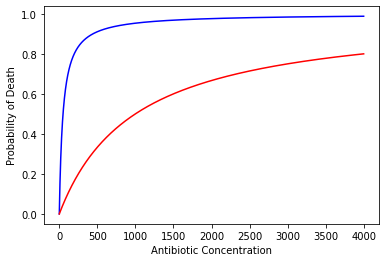

In [ ]:
import matplotlib.pyplot as plt

# define list of ab concentrations
abr_conc = range(0,4*1000)

# Calculates the probability of bacterial death for a susceptible agent
abr1_hf_kl = 49.1 # ug/ml
prob_death_susc = []
for abr1_con in abr_conc:
  prob_death_susc.append((abr1_con) / (abr1_con + (abr1_hf_kl)))

# Calculates the probability of bacterial death for a resistant agent
abr1_hf_kl = 1000 # ug/ml
prob_death_res = []
for abr1_con in abr_conc:
  prob_death_res.append((abr1_con) / (abr1_con + (abr1_hf_kl)))

# plot results
fig, ax = plt.subplots()

susc, = ax.plot(abr_conc, prob_death_susc, 'b', label = "Susceptible Bacteria")
res, = ax.plot(abr_conc, prob_death_res, 'r', label = "Resistant Bacteria")

ax.set_xlabel("Antibiotic Concentration")
ax.set_ylabel("Probability of Death")

plt.show()

## Tabular
<font color = "green">*The structure of this code was acquired, but variable names are unique.*

AB1 Resistance  AB2 Resistance
Step AgentID                                
0    1                     0               0
     2                     0               0
     3                     0               0
     4                     0               0
     5                     0               0

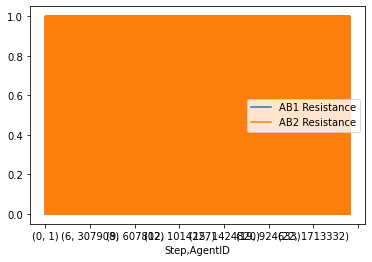

In [ ]:
agent_abr1 = model.graph1.get_agent_vars_dataframe()
agent_abr1.plot()
agent_abr1.head()